In [1]:
#імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import RandomForestRegressor  

# 1. Завантажуємо і знайомимось з даними

In [2]:
#завантажуємо дані
raw_df = pd.read_csv('data/weatherAUS.csv')
raw_df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
#аналізуємо пропущені значення в стовпцях
null_count = raw_df.isnull().sum()
null_percentage = round((raw_df.isnull().sum()/raw_df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : raw_df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
6,Sunshine,69835,48.01
5,Evaporation,62790,43.17
18,Cloud3pm,59358,40.81
17,Cloud9am,55888,38.42
15,Pressure9am,15065,10.36
16,Pressure3pm,15028,10.33
9,WindDir9am,10566,7.26
7,WindGustDir,10326,7.10
8,WindGustSpeed,10263,7.06
14,Humidity3pm,4507,3.10


1. Згідно отриманих результатів бачимо, що в нас є ситуації, коли відсутні більше 40% значень. Такі пусті значення будемо видаляти
2. Також бачимо, що є відсутні значення в показниках `RainToday` та `RainTomorrow`, що є важливими для нашого дослідження. Такі пусті значення також видалимо

# 2. Працюємо з пустимим значеннями

In [5]:
#видаляємо пусті дані з колонок, що мають більше 40% пропущених значень
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()
raw_df.drop(columns = columns_to_be_deleted, inplace = True)

In [6]:
#видаляємо пусті дані з колонок RainToday та RainTomorrow
raw_df = raw_df.dropna(subset=['RainToday', 'RainTomorrow'])

Повторюємо аналіз колонок з пустими значеннями

In [7]:
#аналізуємо пропущені значення в стовпцях після попереднього видалення пустих значень
null_count = raw_df.isnull().sum()
null_percentage = round((raw_df.isnull().sum()/raw_df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : raw_df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df[null_df['null_percentage'] > 0].reset_index(drop = True, inplace = True)
null_df[null_df['null_percentage'] > 0].sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
Cloud9am,Cloud9am,52625,37.38
Pressure3pm,Pressure3pm,13769,9.78
Pressure9am,Pressure9am,13743,9.76
WindDir9am,WindDir9am,9660,6.86
WindGustDir,WindGustDir,9163,6.51
WindGustSpeed,WindGustSpeed,9105,6.47
WindDir3pm,WindDir3pm,3670,2.61
Humidity3pm,Humidity3pm,3501,2.49
Temp3pm,Temp3pm,2624,1.86
WindSpeed3pm,WindSpeed3pm,2531,1.80


Далі проаналізуємо окремо числові і категоріальні значення для визначення подальшого методу заповнення пропущених значень

*Аналіз числових змінних*

In [8]:
number_df = raw_df.select_dtypes(include="number")
number_df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,16.987066,21.693183
std,6.403879,7.11450,8.465173,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,40.200000,46.700000


З проведеного аналізу бачимо, що середнє значення і 50-ї персентиль мають незначну різницю в даних, це свідчить про відносну рівномірність розподілу.
Тому відсутні значення будемо заповнювати середнім

In [9]:
# Список назв числових колонок
numeric_cols = number_df.columns

# Заповнення пропусків середніми значеннями
raw_df[numeric_cols] = raw_df[numeric_cols].fillna(raw_df[numeric_cols].mean())

In [10]:
#аналізуємо пропущені значення в стовпцях після попереднього заповнення пустих значень
null_count = raw_df.isnull().sum()
null_percentage = round((raw_df.isnull().sum()/raw_df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : raw_df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df[null_df['null_percentage'] > 0].reset_index(drop = True, inplace = True)
null_df[null_df['null_percentage'] > 0].sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
WindDir9am,WindDir9am,9660,6.86
WindGustDir,WindGustDir,9163,6.51
WindDir3pm,WindDir3pm,3670,2.61


*Аналіз категоріальних змінних*

In [11]:
object_df = raw_df.select_dtypes(include = "object")
object_cols = object_df.columns
object_df.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

**Бачимо, що стовпець з датою у нас зберігається у форматі об"єкта. Змінемо його на формат дати**

In [12]:
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

Оскільки відсутні значення у нас наявні тільки в трьох колонках: `WindGustDir`, `WindDir9am` та `WindDir3pm`; то їх і будемо детально аналізувати

*WindGustDir*

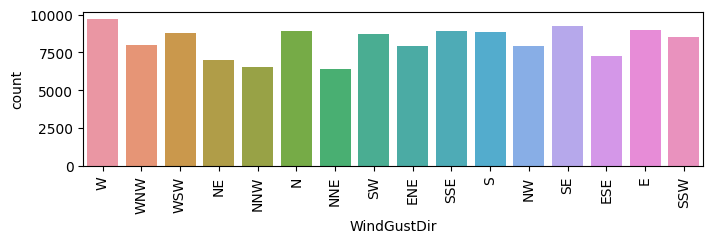

In [13]:
plt.figure(figsize = (8,2))
sns.countplot(data = object_df, x = "WindGustDir")
plt.xticks(rotation = 90)
plt.show()

Оскільки бачимо, що явного лідера з найчастіше використовуваним значенням у нас немає (всі значення відносно рівно використовуються), то пусті значення заповнимо як "Unknown"

In [14]:
raw_df.fillna({'WindGustDir': 'Unknown'}, inplace=True)

*WindDir9am*

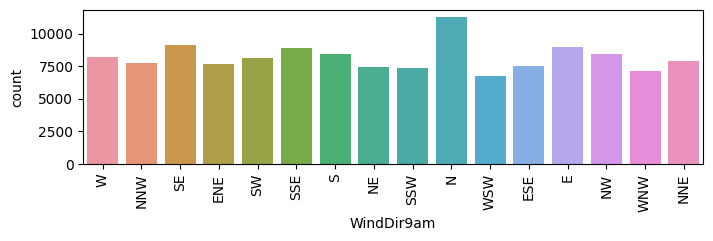

In [15]:
plt.figure(figsize = (8,2))
sns.countplot(data = object_df, x = "WindDir9am")
plt.xticks(rotation = 90)
plt.show()

In [16]:
raw_df.fillna({'WindDir9am': 'Unknown'}, inplace=True)

*WindDir3pm*

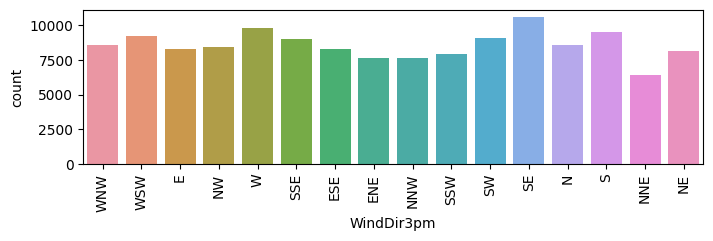

In [17]:
plt.figure(figsize = (8,2))
sns.countplot(data = object_df, x = "WindDir3pm")
plt.xticks(rotation = 90)
plt.show()

In [18]:
raw_df.fillna({'WindDir3pm': 'Unknown'}, inplace=True)

**Отже ми провели попередню обробку відсутніх значень і маємо такі результати:**
1. наш датафрейм скоротився на 5671 рядок (з 145460 на 140787 рядків) або на 3%
2. Наш датафрейм скоротився на три ознаки (з 23 до 20). Це ознаки: `Sunshine`, `Evaporation` і `Cloud3pm`, що мали більше 40% відсутніх значень

In [19]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140787 non-null  float64       
 3   MaxTemp        140787 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   WindGustDir    140787 non-null  object        
 6   WindGustSpeed  140787 non-null  float64       
 7   WindDir9am     140787 non-null  object        
 8   WindDir3pm     140787 non-null  object        
 9   WindSpeed9am   140787 non-null  float64       
 10  WindSpeed3pm   140787 non-null  float64       
 11  Humidity9am    140787 non-null  float64       
 12  Humidity3pm    140787 non-null  float64       
 13  Pressure9am    140787 non-null  float64       
 14  Pressure3pm    140787 non-null  float64       
 15  Cloud

**Наступним кроком нашого аналізу буде визначення ознак, що найкраще впливають на прогнозовування `RainTomorrow`**

# 3. Проводимо кореляційний аналіз даних

Для проведення цього аналізу створимо копію датафрейму `raw_df`

In [20]:
# Створення глибокої копії
raw_df_copy = raw_df.copy(deep=True)

## 3.1. Кодування категоріальних ознак

**Бінарні колонки будемо кодувати вручну**

In [21]:
RainToday_codes = {'No': 0, 'Yes': 1}
raw_df_copy['RainToday'] = raw_df.RainToday.map(RainToday_codes)

RainTomorrow_codes = {'No': 0, 'Yes': 1}
raw_df_copy['RainTomorrow'] = raw_df.RainTomorrow.map(RainTomorrow_codes)

In [22]:
#сформуємо новий перелік числових колонок
numeric_cols_new = raw_df_copy.select_dtypes(include="number").columns

**Мультизначні колонки будемо кодувати за допомогою OneHotEncoder**

In [23]:
ohenc = OneHotEncoder()

ohenc.fit(raw_df_copy[['Location']])
one_hot = ohenc.transform(raw_df_copy[['Location']]).toarray()
raw_df_copy[ohenc.categories_[0]] = one_hot

ohenc.fit(raw_df_copy[['WindGustDir']])
one_hot = ohenc.transform(raw_df_copy[['WindGustDir']]).toarray()
raw_df_copy[ohenc.categories_[0]] = one_hot

ohenc.fit(raw_df_copy[['WindDir9am']])
one_hot = ohenc.transform(raw_df_copy[['WindDir9am']]).toarray()
raw_df_copy[ohenc.categories_[0]] = one_hot

ohenc.fit(raw_df_copy[['WindDir3pm']])
one_hot = ohenc.transform(raw_df_copy[['WindDir3pm']]).toarray()
raw_df_copy[ohenc.categories_[0]] = one_hot

## 3.2. Масштабування числових ознак

In [24]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(raw_df_copy[numeric_cols])
raw_df_copy[numeric_cols] = scaler.transform(raw_df_copy[numeric_cols])

## 3.3. Кореляційний аналіз

In [26]:
#Вибираємо з копії датасета лише числові ознаки
corr_df = raw_df_copy.select_dtypes(include="number")

<Axes: >

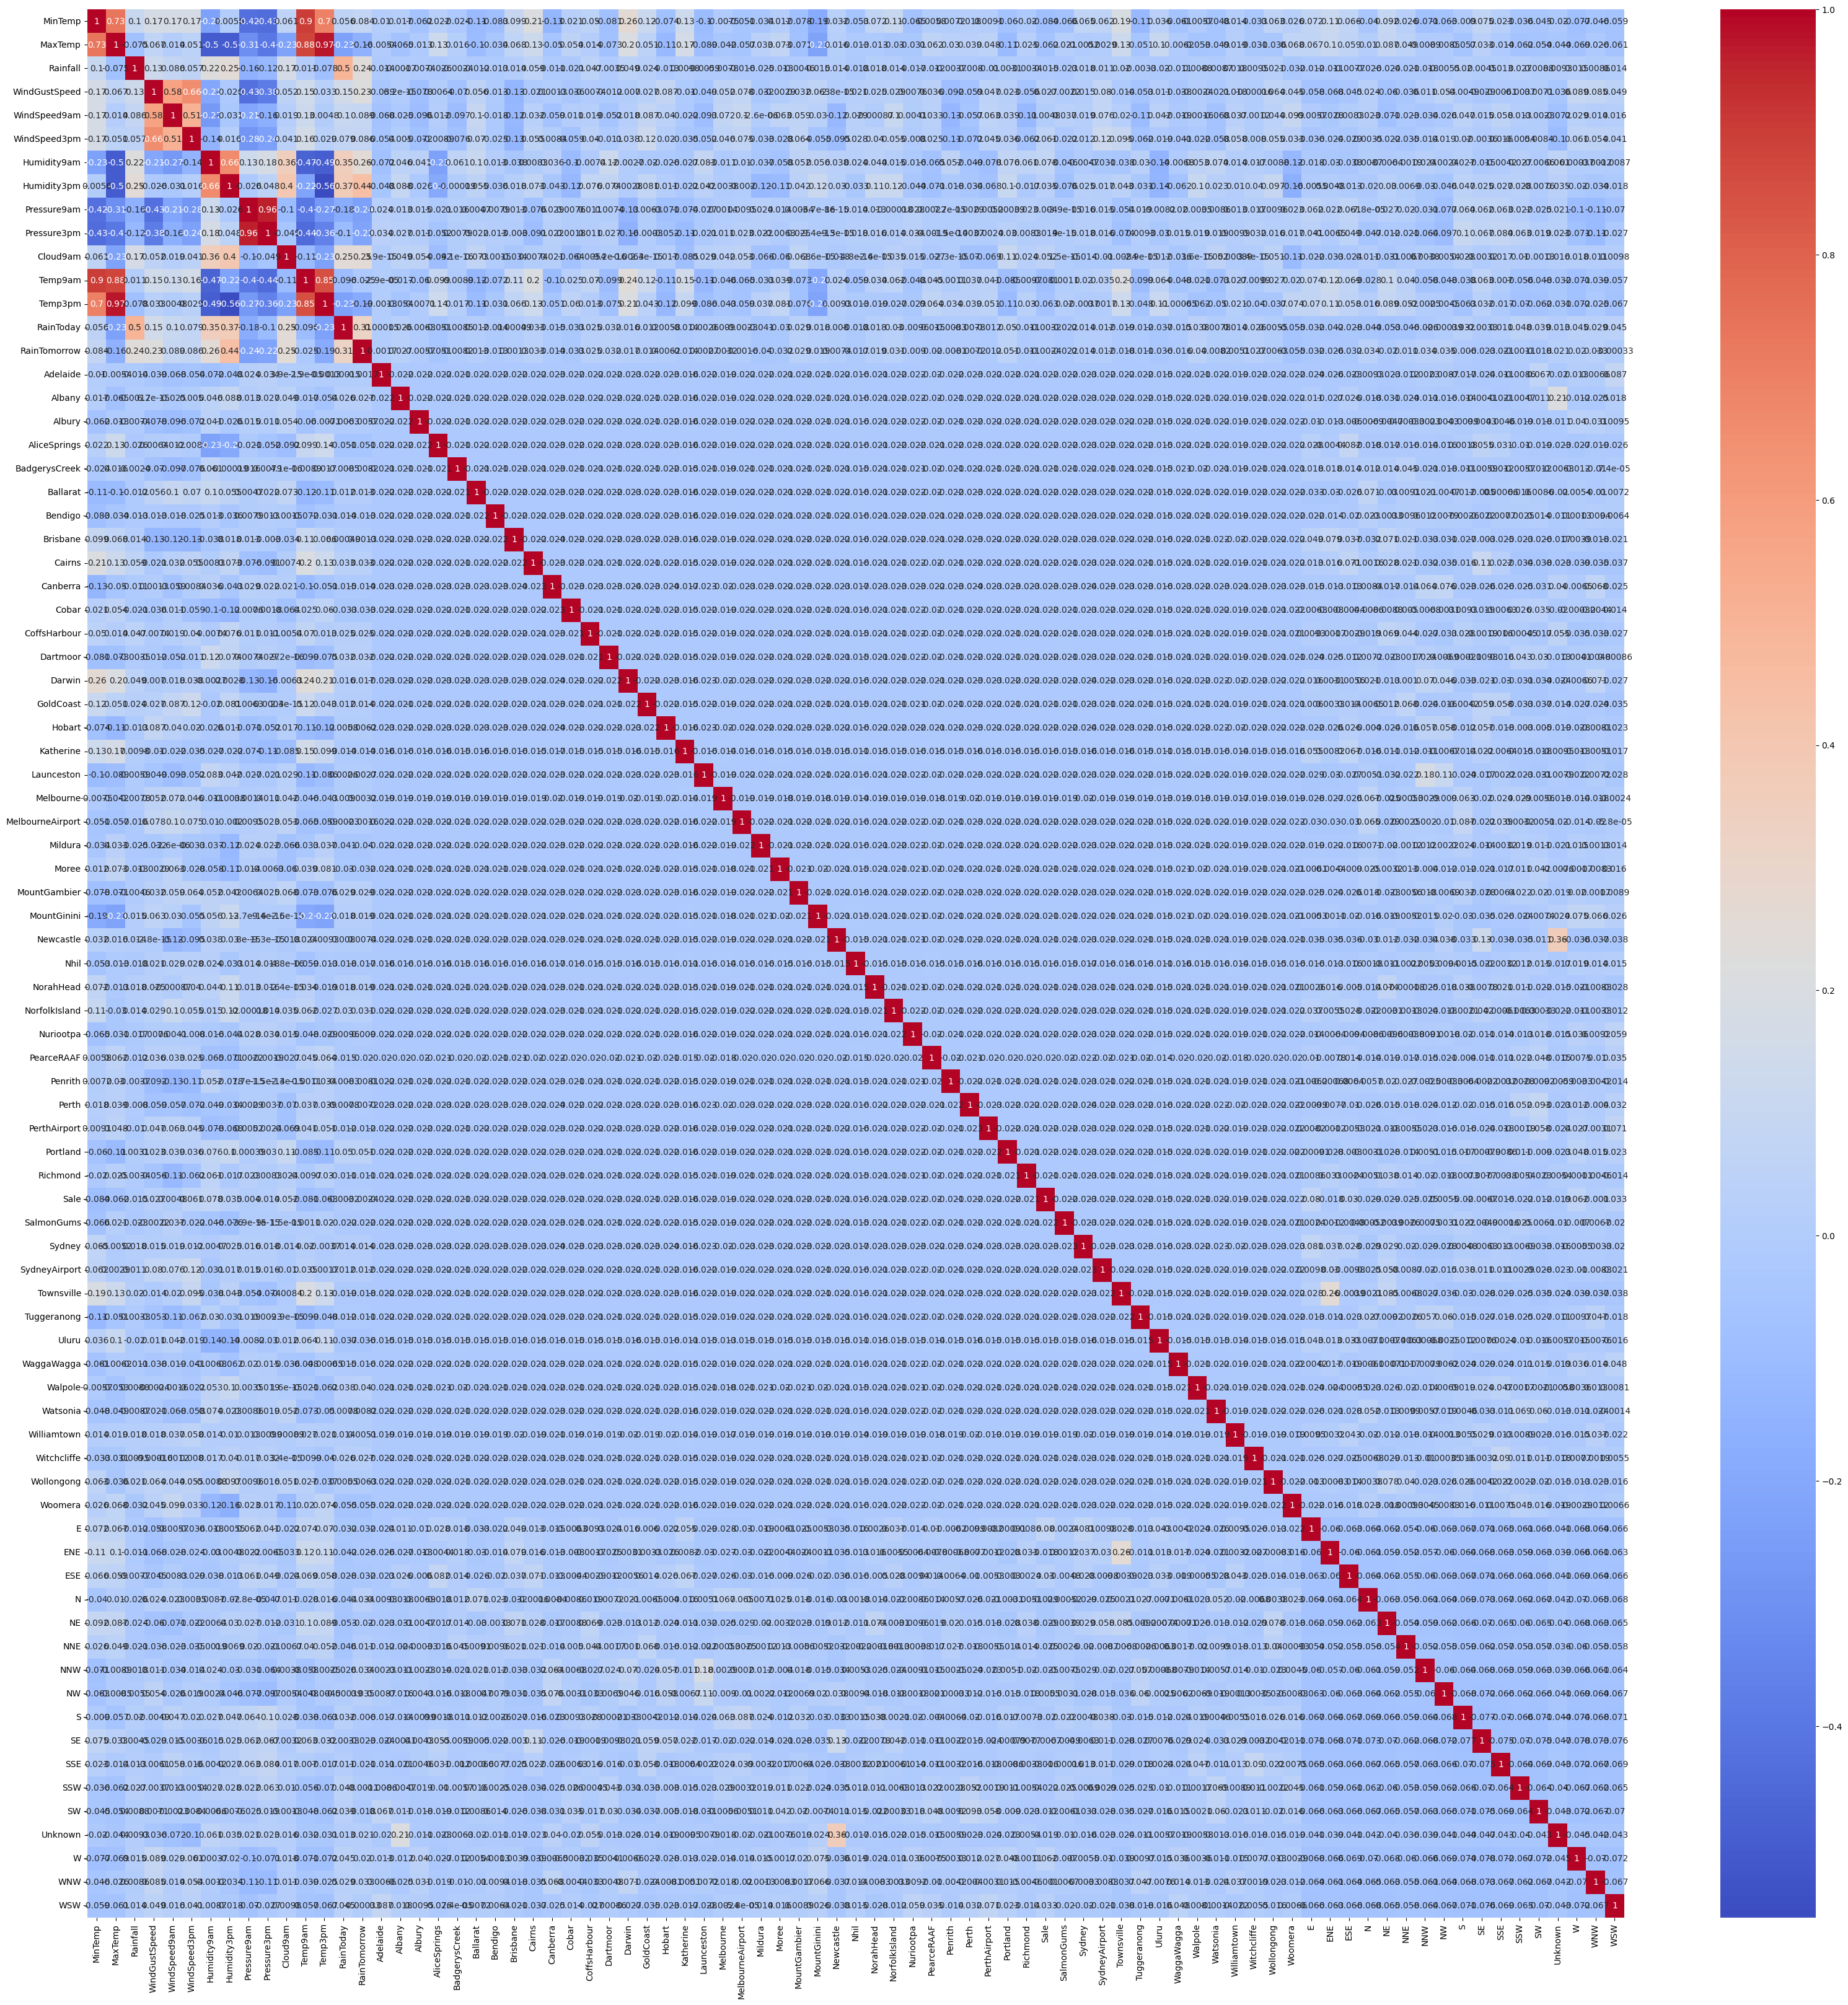

In [27]:
plt.figure(figsize=(40,40))
sns.heatmap(corr_df.corr(),annot=True,cmap="coolwarm")

З візуалізації бачимо, що більш-менш корелюючі ознаки знаходяться в лівій частині візуалізації (до використання OneHotEncoder()). Спробуємо взяти тільки ті числові колонки, які були до цього етапу

<Axes: >

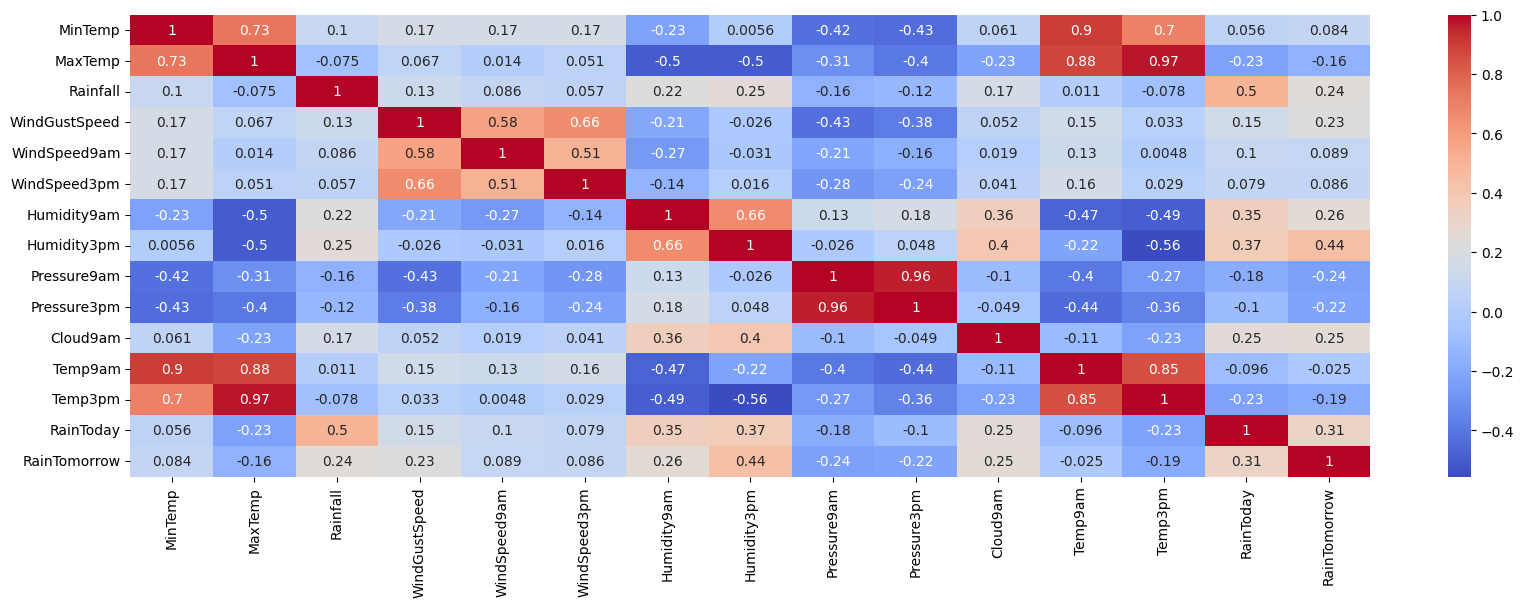

In [28]:
corr_df = raw_df_copy[numeric_cols_new]
plt.figure(figsize=(20,6))
sns.heatmap(corr_df.corr(),annot=True,cmap="coolwarm")

In [29]:
corr_df.corr()['RainTomorrow'].sort_values()

Pressure9am     -0.235941
Pressure3pm     -0.216805
Temp3pm         -0.190700
MaxTemp         -0.159270
Temp9am         -0.025371
MinTemp          0.084179
WindSpeed3pm     0.085901
WindSpeed9am     0.089463
WindGustSpeed    0.225592
Rainfall         0.239032
Cloud9am         0.254313
Humidity9am      0.256047
RainToday        0.313097
Humidity3pm      0.441531
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

З отриманого результату бачимо, що мінімальний вплив на ~RainTomorrow~ мають:
- Temp3pm         -0.190700
- MaxTemp         -0.159270
- Temp9am         -0.025371
- MinTemp          0.084179
- WindSpeed3pm     0.085901
- WindSpeed9am     0.089463


Ці ознаки ми виключемо з оригінального датасету для подальшої роботи

In [30]:
columns_deleted = ['Temp3pm', 'MaxTemp', 'Temp9am', 'MinTemp', 'WindSpeed3pm', 'WindSpeed9am']
raw_df.drop(columns = columns_deleted, inplace = True)

Збережемо отриманий очищений датасет для подальшої роботи і деплоймента

In [31]:
raw_df.to_csv('data/ready_to_predict.csv', index=False)

# 4. Будуємо модель Random Forest 

In [32]:
#завантажуємо дані
df = pd.read_csv('data/ready_to_predict.csv')

**Розробляємо і зберігаємо модель**

F1 score: 0.55%


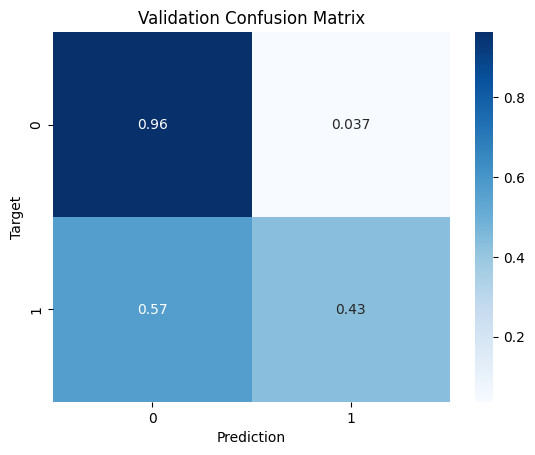

F1 score: 0.58%


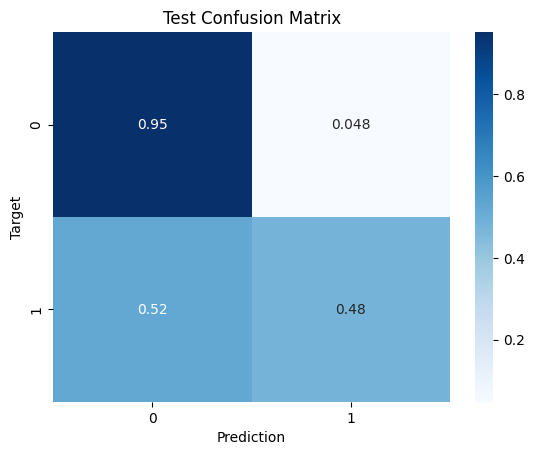

['models/streamlit_pipeline.joblib']

In [33]:
# Розбиваємо дані на тренувальні, валідаційні та тестові набори
year = pd.to_datetime(df.Date).dt.year
train_df, val_df, test_df = df[year < 2015], df[year == 2015], df[year > 2015]

# Створюємо цільові і нецільові ознаки
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]
test_inputs, test_targets = test_df[input_cols], test_df[target_col]

# Визначаємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# Створюємо пайплайни для обробки числових і категоріальних даних
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
])

# Об"єднуємо трансформери в препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Створюємо пайплайн, що включає попередню обробку і модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Тренуємо модель
model_pipeline.fit(train_inputs, train_targets)

# Допоміжна функція для прогнозування, обчислення точності та побудови матриці плутанини
def predict_and_plot(inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    f1 = f1_score(targets, preds, pos_label='Yes')
    print("F1 score: {:.2f}%".format(f1))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінка на тестовому наборі
val_preds = predict_and_plot(val_inputs, val_targets, 'Validation')
test_preds = predict_and_plot(test_inputs, test_targets, 'Test')

# Збереження наренованої моделі
joblib.dump(model_pipeline, 'models/streamlit_pipeline.joblib')